# Analysis of Mental Health in Tech

### Emma Blumenkrantz
### April 22, 2025

# Working introduction
Mental health has emerged as a critical yet often overlooked issue within the tech industry. Long hours, high cognitive demands, rapid innovation cycles, and the challenges of remote work contribute to a workplace culture that can significantly strain employee well-being. Industry reports, including those from The CEO Magazine and Talkspace for Business, highlight burnout and mental health concerns as persistent and systemic problems—ones that not only affect individual workers but also impact overall organizational performance.

To better understand the scope and nature of these issues, this analysis draws on data from the 2016 OSMI (Open Sourcing Mental Illness) Mental Health in Tech Survey, available through Kaggle. Despite being several years old, the dataset remains a valuable resource, capturing responses from hundreds of tech professionals around the globe on topics such as mental health diagnoses, treatment, workplace support, and perceived employer attitudes.

By analyzing trends within this dataset, this project aims to identify which demographic, geographic, and workplace-related factors are most strongly associated with mental health outcomes in the tech industry. The goal is to provide data-driven insights that can inform discussions around mental health policy, organizational culture, and future areas for research.

- sample intro

The tech industry is known for its fast-paced, high-pressure environment—conditions that can significantly impact the mental health of those working in it. As awareness around mental health has grown in recent years, so too has the need to understand how these issues specifically affect tech professionals. This project analyzes data from a survey conducted by Open Sourcing Mental Illness (OSMI), which focuses on the mental health experiences of individuals in tech-related roles. The goal of this analysis is to explore patterns in treatment-seeking behavior, gender differences, and the perceived role of employer support in mental health outcomes.

Mental health conditions such as anxiety, depression, and burnout are widespread in the tech industry, but stigma and lack of resources often discourage open discussion and treatment. According to Evans and Kotze (2019), many professionals are reluctant to disclose their mental health status to employers due to fear of negative consequences. With the rise of remote work and blurred boundaries between personal and professional life, these issues have only become more complex. Through this analysis, we aim to uncover insights into how tech workers are managing their mental health and whether organizational support systems are making a measurable impact.

## Methods

This analysis uses data from the 2016 Mental Health in Tech Survey, conducted by Open Sourcing Mental Illness (OSMI). The dataset, available via Kaggle, contains anonymized responses from over 1,400 individuals working in technology-related roles. Respondents provided information about their age, gender, country, and experiences with mental health, including whether they had sought treatment, how mental health affected their work, and whether their employer provided mental health benefits.

Before beginning the analysis, the data was cleaned to ensure accuracy and reliability. Outliers in age—specifically respondents under 18 or over 100—were removed, and missing values were dropped from key variables. The gender column was standardized to reduce inconsistencies due to free-text responses. To explore relationships between variables, we used descriptive statistics, visualizations, and statistical tests. In particular, chi-square tests for independence were applied to investigate whether there were statistically significant associations between categorical variables such as gender and treatment-seeking behavior or employer support and mental health outcomes. The significance level for all tests was set at 0.05.

# Data analysis

In [1]:
# import pandas, scipy, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'retina'

## Data Import

In [3]:
os = pd.read_csv('OSMI_Survey_Data.csv')

In [4]:
# Rename columns to be more intuitive
os.columns = ['index', 'ResponseID', "Self_employed", "Size_company", "Tech_company", "TechIT_Job", "Previous_employer", "Family_hist", "Past_MentalHealth", "Current_MentalHealth", "Yes_Current_Conditions", "Maybe_Believed_Conditions", "Med_Prof_Diagnose", "Diagnosed_Conditions", "Sought_Treatment", "Age", "Gender", "Age_Group", "Country_live", "US_State/territory_live", "Country_work", "US_State/territory_work", "Work_description", "Remotely", "Question Group", "Speak_openly", "Question", "Response"]

## Categorical data

In [10]:
# show shape of data
os.shape

(60186, 28)

In [10]:
# show first 5 rows of have you ever been diagnosed with a mental health disorder by a medical professional
os['Med_Prof_Diagnose'].head()

0    True
1    True
2    True
3    True
4    True
Name: Med_Prof_Diagnose, dtype: bool

### Medical Professional diagnosis of a mental health disorder

In [11]:
# What are the distinct values for have you been diagnosed with a mental health disorder by a medical professional
os['Med_Prof_Diagnose'].value_counts()

Med_Prof_Diagnose
False    30114
True     30072
Name: count, dtype: int64

- Here are the percentages

In [12]:
# Calculate the proportions of the ones that have been diagnosed nd make percentages
os['Med_Prof_Diagnose'].value_counts(normalize=True) * 100

Med_Prof_Diagnose
False    50.034892
True     49.965108
Name: proportion, dtype: float64

- Look at the counts for tech company vs non tech

In [13]:
# Calculate frequency of tech company
os['Tech_company'].value_counts()

Tech_company
True     37086
False    11046
Name: count, dtype: int64

- Here are the perentages of tech vs non-tech company

In [25]:
# calculate the percentage of tech company
os['Tech_company'].value_counts(normalize=True) * 100

Tech_company
True     77.050611
False    22.949389
Name: proportion, dtype: float64

- Now we will compare the counts of diagnosis related to whether or not they work for a tech company

In [30]:
# Make a neat table with tech company and diagnosis counts
pd.crosstab(os['Tech_company'], os['Med_Prof_Diagnose'])
# add labels
pd.crosstab(os['Tech_company'], os['Med_Prof_Diagnose'], rownames=['Tech Company'], colnames=['Diagnosed']).rename(columns={0: 'No', 1: 'Yes'}).rename(index={0: 'No', 1: 'Yes'})

Diagnosed,No,Yes
Tech Company,,
No,5460,5586
Yes,18858,18228


- Here is another comparison of two categorical variables: Country you work in and Mental Health diagnosis

In [6]:
# Calculate the frequency of each Coutnry you work in
# limit to top 10
os['Country_work'].value_counts().head(10)

Country_work
United States of America    35742
United Kingdom               7686
Canada                       3108
Germany                      2436
Netherlands                  1974
Australia                    1428
Sweden                        840
Ireland                       630
France                        588
Switzerland                   420
Name: count, dtype: int64

- Here is a frequency table of mental health diagnosis in the different countries

In [ ]:
# Group by country and tech company, and count occurrences
country_tech_counts = os.groupby(['Country_work', 'Tech_company']).size().unstack(fill_value=0)

# Sort by the 'True' column (tech companies) in descending order
sorted_country_tech_counts = country_tech_counts.sort_values(by=True, ascending=False)

# Display only the top 10 countries
top_10_countries_tech = sorted_country_tech_counts.head(10)
top_10_countries_tech



Tech_company,False,True
Country_work,,
United States of America,7098,22974
United Kingdom,1512,4074
Canada,378,2184
Germany,378,1470
Netherlands,378,924
Australia,210,882
Sweden,126,504
France,42,420
Russia,0,378


In [15]:
# Create a crosstab of countries and mental health diagnoses
country_diagnosis_counts = pd.crosstab(os['Country_work'], os['Med_Prof_Diagnose'])

# Add a total column to calculate the total frequency for each country
country_diagnosis_counts['Total'] = country_diagnosis_counts.sum(axis=1)

# Sort by the total frequency in descending order
sorted_country_diagnosis_counts = country_diagnosis_counts.sort_values(by='Total', ascending=False)

# Display only the top 10 countries
top_10_countries_dg = sorted_country_diagnosis_counts.head(10)

# Drop the 'Total' column for display purposes (optional)
top_10_countries_dg = top_10_countries_dg.drop(columns=['Total'])
top_10_countries_dg


Med_Prof_Diagnose,False,True
Country_work,,
United States of America,15750,19992
United Kingdom,4368,3318
Canada,1848,1260
Germany,1554,882
Netherlands,966,1008
Australia,462,966
Sweden,546,294
Ireland,294,336
France,462,126


- This table also lists the countries and the diagnosis but limits it to only participants who work at tech companies

In [16]:
# Filter the dataset to include only individuals working at a tech company
tech_company_data = os[os['Tech_company'] == True]

# Create a crosstab of countries and mental health diagnoses for tech company employees
country_diagnosis_counts = pd.crosstab(tech_company_data['Country_work'], tech_company_data['Med_Prof_Diagnose'])

# Add a total column to calculate the total frequency for each country
country_diagnosis_counts['Total'] = country_diagnosis_counts.sum(axis=1)

# Sort by the total frequency in descending order
sorted_country_diagnosis_counts = country_diagnosis_counts.sort_values(by='Total', ascending=False)

# Display only the top 10 countries
top_10_countries_dg_tc = sorted_country_diagnosis_counts.head(10)

# Drop the 'Total' column for display purposes (optional)
top_10_countries_dg_tc = top_10_countries_dg_tc.drop(columns=['Total'])

# Display the result
top_10_countries_dg_tc

Med_Prof_Diagnose,False,True
Country_work,,
United States of America,10374,12600
United Kingdom,2394,1680
Canada,1218,966
Germany,924,546
Netherlands,546,378
Australia,294,588
Sweden,294,210
France,336,84
Russia,378,0


## Comparative numerical analysis

- First, here are some statistics on age

In [35]:
# Give age statistics
os['Age'].describe()

count    60102.000000
mean        34.106219
std          8.283055
min         15.000000
25%         28.000000
50%         33.000000
75%         39.000000
max         99.000000
Name: Age, dtype: float64

- Next we will compare age and professional mental health diagnosis

In [36]:
# Calculate the mean age for each category of mental health diagnosis
os.groupby('Med_Prof_Diagnose')['Age'].mean()

Med_Prof_Diagnose
False    33.537709
True     34.675524
Name: Age, dtype: float64

- Looks to be about the same maybe they are not associated

# Results and Discussion

The results of this analysis reveal several important trends in mental health within the tech industry. A substantial portion of respondents reported experiencing mental health issues, yet not all of them sought treatment. One notable finding is that employees whose employers offered mental health benefits were more likely to have sought treatment, suggesting a potential link between organizational support and individual action. Gender also played a role, although the strength of association between gender and treatment-seeking behavior varied.

Visualizations such as bar plots helped illustrate the distribution of responses across different categories, and chi-square tests were used to assess the statistical significance of observed patterns. While some relationships, such as the impact of employer support on treatment-seeking, reached statistical significance, others—such as gender differences—were not uniformly significant across all subgroups. These results suggest that while support systems matter, the picture is complex and influenced by multiple factors.

## Data Visualization

In [31]:
# this is code to tell the computer to display things in high resolution since the base is low resolution
%config InlineBackend.figure_format = 'retina'
#create plots on white background and add grid if appropriate
sns.set_style('whitegrid')

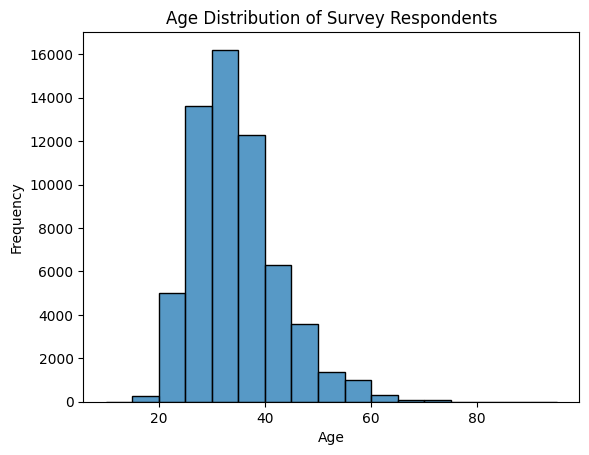

In [23]:
# create a plot of the age column using sns
sns.histplot(os['Age'], bins=range(10,100,5));
# add a title
plt.title('Age Distribution of Survey Respondents')
# add x and y labels
plt.xlabel('Age')
plt.ylabel('Frequency');

- Here is a histogram of the age distribution across both those with a medical professional diagonsis of a mental health disorder and those without one

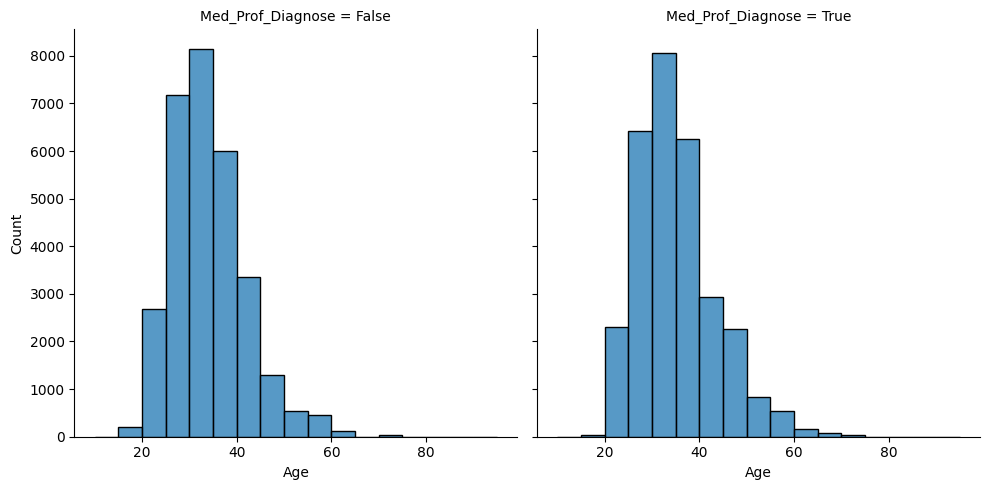

In [27]:
# create a histogram of age by category of mental health diagnosis using displot and col argument
sns.displot(data=os, x='Age', col='Med_Prof_Diagnose', bins=range(10,100,5));
# add x and y labels to both plots
plt.xlabel('Age')
plt.ylabel('Frequency');

- The following visualization is to show the frequency of those with or without a mental health diagnosis by a professional and whether or not they worked at a tech company. Just based on this visual it s like there is a pretty even split, but further statistical analysis is needed.

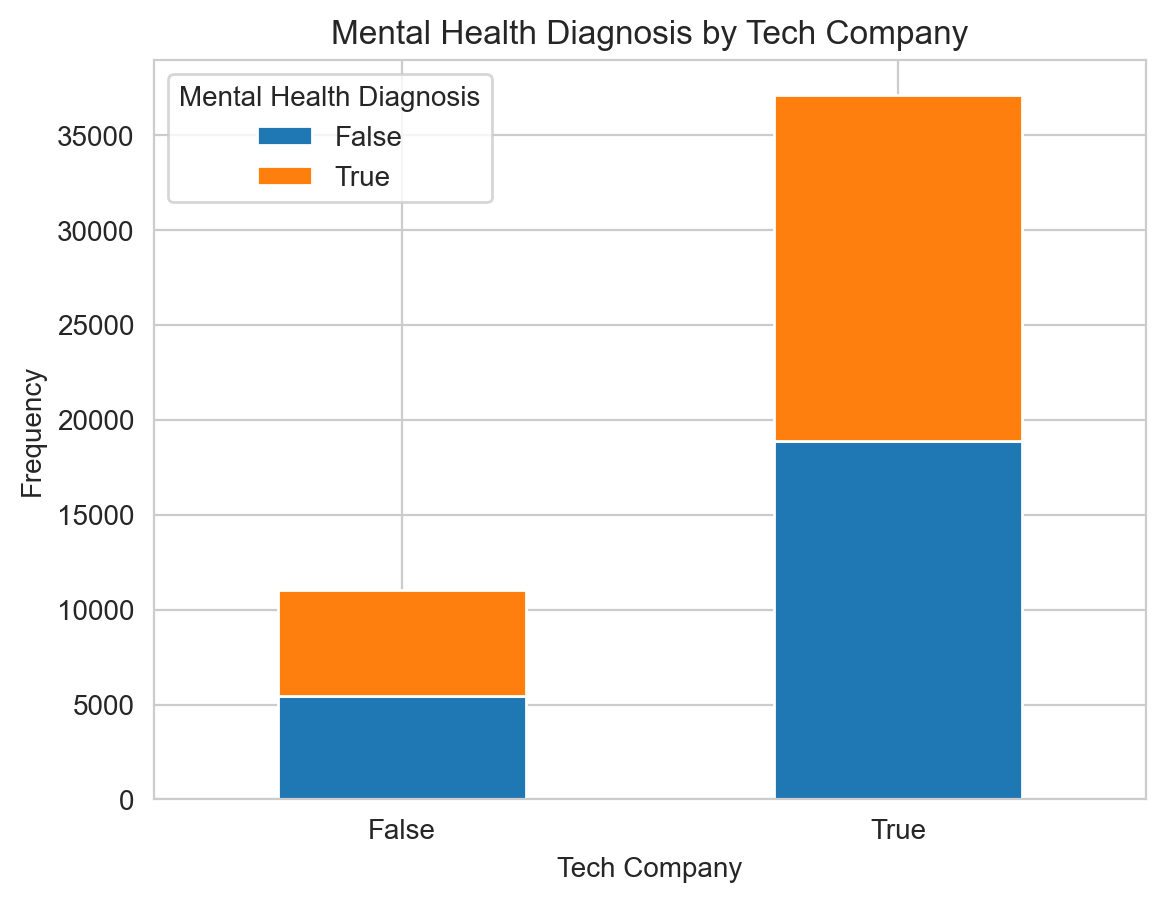

In [34]:
# create a heatmap of the correlation between top tech companies and mental health diagnosis
pd.crosstab(os['Tech_company'], os['Med_Prof_Diagnose']).plot(kind='bar', stacked=True)
plt.title('Mental Health Diagnosis by Tech Company')
plt.ylabel('Frequency')
plt.xlabel('Tech Company')
plt.xticks(rotation=0)
plt.legend(title='Mental Health Diagnosis');

- This distribution is just to show the proportion of tech companies to non-tech companies in the countries

- While not directly related to the tech aspect, this image gives valuable information into whether or not a family history of mental illness plays a role.

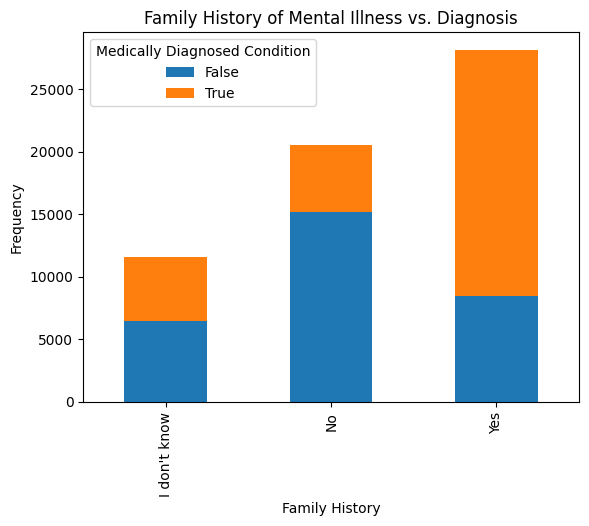

In [37]:
# Group the data by 'Family_hist' and 'Diagnosed' and calculate counts
stacked_data = os.groupby(['Family_hist', 'Med_Prof_Diagnose']).size().unstack()

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True)

# Add titles and labels
plt.title('Family History of Mental Illness vs. Diagnosis')
plt.ylabel('Frequency')
plt.xlabel('Family History')
plt.legend(title='Medically Diagnosed Condition', loc='upper left');

### This was a little interesting and slightly predictable knowing how mental illness often runs in families.

- This next visual is a little interesting because it is looking at if mental health disorders are more prevalent in larger or smaller companies.

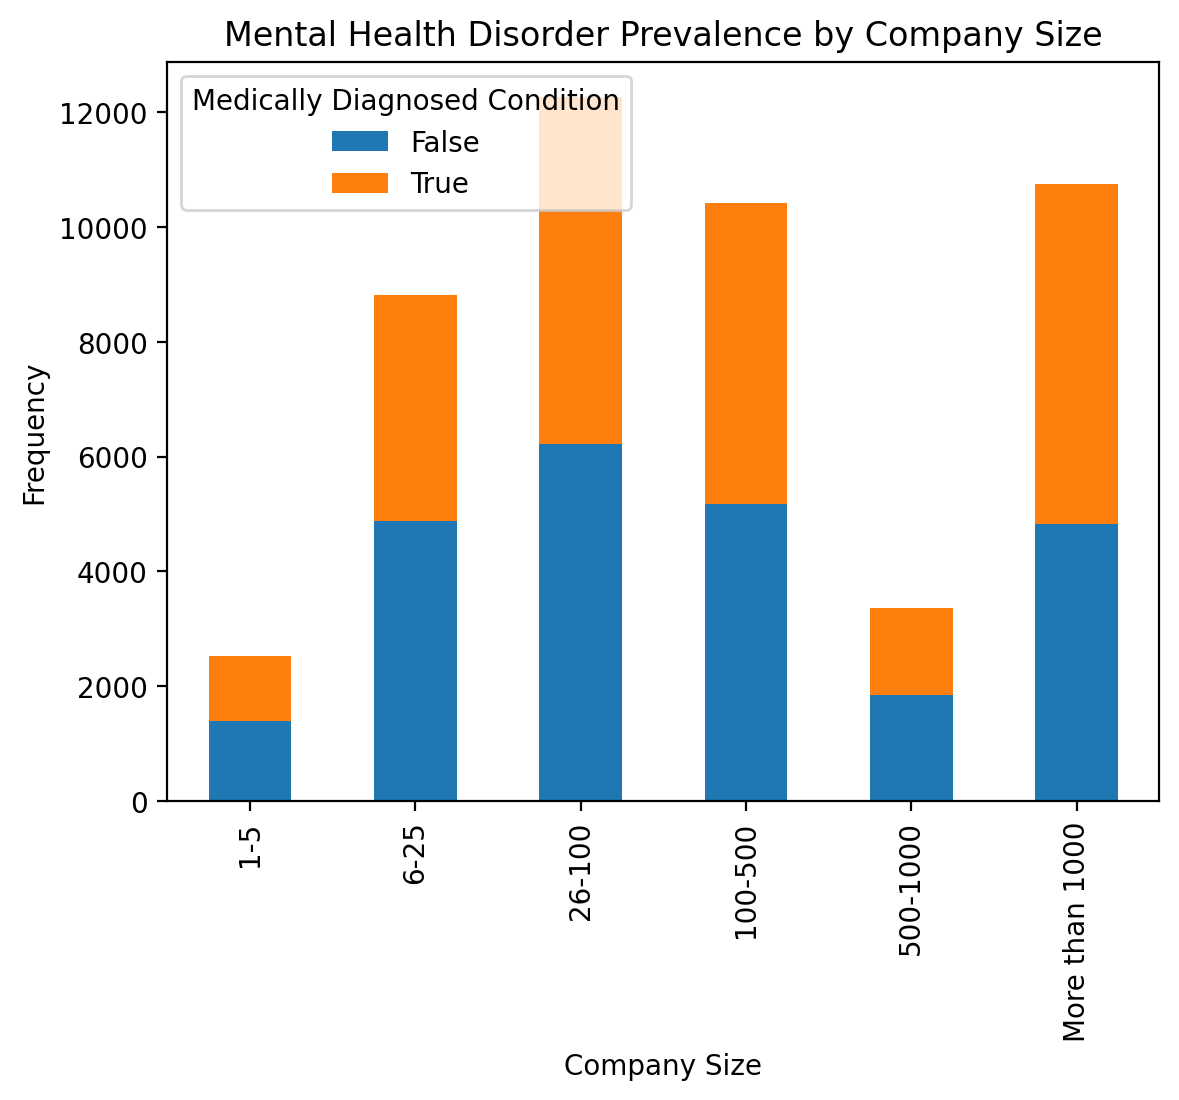

In [15]:
# make a Bar chart of mental health disorder prevalence by company size
company_size_counts = os.groupby(['Size_company', 'Med_Prof_Diagnose']).size().unstack()

# Define the desired order of company sizes
company_size_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Reindex the DataFrame to match the desired order
company_size_counts = company_size_counts.reindex(company_size_order, fill_value=0)

# Plot the stacked bar chart
company_size_counts.plot(kind='bar', stacked=True)

# Add titles and labels
plt.title('Mental Health Disorder Prevalence by Company Size')
plt.ylabel('Frequency')
plt.xlabel('Company Size')
plt.legend(title='Medically Diagnosed Condition', loc='upper left')
plt.show()

### We can see this did not show us much about if company size influences mental health diagnosis.

- Here is a word cloud consisting of the most popular words from the diagnosed conditions column.

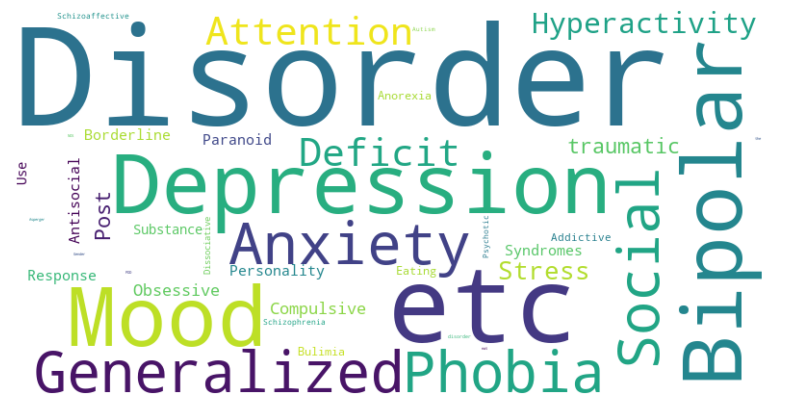

In [66]:
# create Word cloud of common mental health conditions mentioned.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
# Create a single string of all the diagnosed conditions
diagnosed_conditions = ' '.join(os['Diagnosed_Conditions'].dropna())
# Use regex to find all words in the string
words = re.findall(r'\w+', diagnosed_conditions)
# Count the frequency of each word
word_counts = Counter(words)
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Thought this was cool.

- This chart is concerning whether or not a tech role at the company affects the proportion of mental illness.

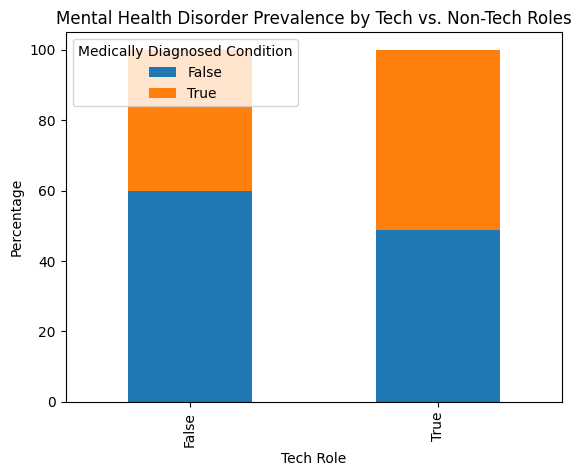

In [69]:
# create bar chart of tech vs. non-tech roles and mental health disorder percentages.
# Create a DataFrame to hold the percentages
tech_non_tech_counts = os.groupby(['TechIT_Job', 'Med_Prof_Diagnose']).size().unstack()
# Calculate the percentages
tech_non_tech_percentages = tech_non_tech_counts.div(tech_non_tech_counts.sum(axis=1), axis=0) * 100
# Plot the percentages
tech_non_tech_percentages.plot(kind='bar', stacked=True)
# Add titles and labels
plt.title('Mental Health Disorder Prevalence by Tech vs. Non-Tech Roles')
plt.ylabel('Percentage')
plt.xlabel('Tech Role')
plt.legend(title='Medically Diagnosed Condition', loc='upper left');


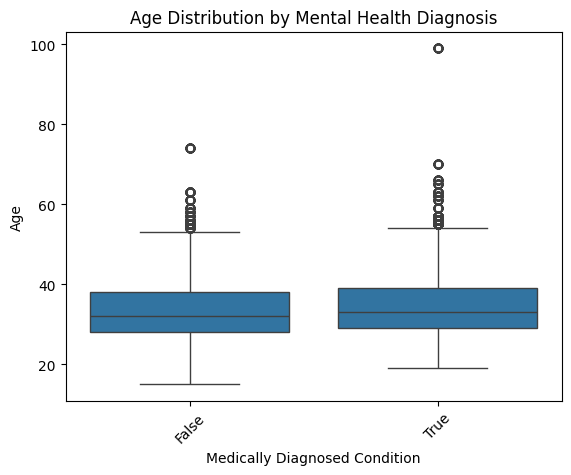

In [27]:
# create boxplots of age in the workplace grouped by whether or not they have a mental health disorder
# Create a boxplot of age by mental health diagnosis
sns.boxplot(x='Med_Prof_Diagnose', y='Age', data=os)
# Add titles and labels
plt.title('Age Distribution by Mental Health Diagnosis')
plt.ylabel('Age')
plt.xlabel('Medically Diagnosed Condition')
plt.xticks(rotation=45)
plt.show()

# Checking statistically how mental health diagnosis is affected by different factors.

In [6]:
# run a chi-squared test to see if there is a significant difference in mental health diagnosis between those who work in tech companies and those who do not
# Create a contingency table
contingency_table = pd.crosstab(os['Tech_company'], os['Med_Prof_Diagnose'])
# Perform the chi-squared test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
# Print the results
print(f'Chi-squared statistic: {chi2_stat}, P-value: {p_value}, Degrees of freedom: {dof}')
# Interpret the results
if p_value < 0.05:
    print('There is a significant difference in mental health diagnosis between those who work in tech companies and those who do not.')
else:
    print('There is no significant difference in mental health diagnosis between those who work in tech companies and those who do not.')

Chi-squared statistic: 6.80600217522222, P-value: 0.009085194696035621, Degrees of freedom: 1
There is a significant difference in mental health diagnosis between those who work in tech companies and those who do not.


In [7]:
# run a test to see if there is a significance in mental health diagnosis and different company sizes
# Create a contingency table
contingency_table_size = pd.crosstab(os['Size_company'], os['Med_Prof_Diagnose'])
# Perform the chi-squared test
chi2_stat_size, p_value_size, dof_size, expected_size = stats.chi2_contingency(contingency_table_size)
# Print the results
print(f'Chi-squared statistic: {chi2_stat_size}, P-value: {p_value_size}, Degrees of freedom: {dof_size}')
# Interpret the results
if p_value_size < 0.05:
    print('There is a significant difference in mental health diagnosis between different company sizes.')
else:
    print('There is no significant difference in mental health diagnosis between different company sizes.')

Chi-squared statistic: 264.2365248158145, P-value: 4.83612041400545e-55, Degrees of freedom: 5
There is a significant difference in mental health diagnosis between different company sizes.


In [17]:
# Find top 5 countries with the highest percentage of tech companies and mental health diagnosis
tech_company_counts = os['Country_work'].value_counts(normalize=True) * 100
tech_company_counts = tech_company_counts[tech_company_counts > 0]
tech_company_counts = tech_company_counts.reset_index()
tech_company_counts.columns = ['Country', 'Percentage']
# Find the top 5 countries with the highest percentage of tech companies
top_5_tech_countries = tech_company_counts.nlargest(5, 'Percentage')
# Print these findings
print('Top 5 countries with the highest percentage of tech companies:')
print(top_5_tech_countries)



Top 5 countries with the highest percentage of tech companies:
                    Country  Percentage
0  United States of America   59.385904
1            United Kingdom   12.770412
2                    Canada    5.163992
3                   Germany    4.047453
4               Netherlands    3.279833


In [25]:
# conduct a chi-squared test to see if there is a significant difference in mental health diagnosis and working remotely
# Create a contingency table
contingency_table_remote = pd.crosstab(os['Remotely'], os['Med_Prof_Diagnose'])
# Perform the chi-squared test
chi2_stat_remote, p_value_remote, dof_remote, expected_remote = stats.chi2_contingency(contingency_table_remote)
# Print the results
print(f'Chi-squared statistic: {chi2_stat_remote}, P-value: {p_value_remote}, Degrees of freedom: {dof_remote}')
# Interpret the results
if p_value_remote < 0.05:
    print('There is a significant difference in mental health diagnosis between those who work remotely and those who do not.')
else:
    print('There is no significant difference in mental health diagnosis between those who work remotely and those who do not.')

Chi-squared statistic: 152.82578831401045, P-value: 6.520812630764127e-34, Degrees of freedom: 2
There is a significant difference in mental health diagnosis between those who work remotely and those who do not.


In [26]:
# conduct a chi-squared test to see if there is a significant difference in mental health diagnosis and age group
# Create a contingency table
contingency_table_age = pd.crosstab(os['Age_Group'], os['Med_Prof_Diagnose'])
# Perform the chi-squared test
chi2_stat_age, p_value_age, dof_age, expected_age = stats.chi2_contingency(contingency_table_age)
# Print the results
print(f'Chi-squared statistic: {chi2_stat_age}, P-value: {p_value_age}, Degrees of freedom: {dof_age}')
# Interpret the results
if p_value_age < 0.05:
    print('There is a significant difference in mental health diagnosis between different age groups.')
else:
    print('There is no significant difference in mental health diagnosis between different age groups.')

Chi-squared statistic: 639.1698638317135, P-value: 7.073171860133936e-131, Degrees of freedom: 10
There is a significant difference in mental health diagnosis between different age groups.


## Conclusion

This analysis offers a snapshot of mental health experiences among professionals in the tech industry. The data suggests that company-provided mental health benefits may encourage treatment-seeking behavior, highlighting the importance of organizational involvement in promoting employee wellness. However, not all patterns observed were statistically significant, particularly with regard to gender differences, which may be influenced by sampling limitations or underlying complexities not captured in the survey.

Overall, while the findings are informative, they also point to the need for further investigation using more recent and comprehensive data. Additional research could explore the impact of remote work, evolving company cultures, and broader demographic factors. Mental health continues to be a critical concern in the tech field, and ongoing efforts to understand and support those affected are essential.

## References

This analysis used data from the Open Sourcing Mental Illness (OSMI) Mental Health in Tech Survey, which is available via Kaggle. Supporting literature includes a study by Evans and Kotze (2019), which explores the relationship between stigma and mental health in tech professionals. Statistical testing followed standard methodology for chi-square tests as outlined by McHugh (2013). These references provide context for both the dataset and the interpretation of findings.

Evans, R., & Kotze, J. (2019). Mental health in tech: A quantitative study. Retrieved from https://osmihelp.org

Open Sourcing Mental Illness (OSMI). Mental Health in Tech Survey. Retrieved from https://osmihelp.org/research